In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
vgs_df = pd.read_csv("data/vgsales.csv", header=0, sep=",")

In [6]:
pd.options.display.max_columns = False
pd.options.display.expand_frame_repr = False

In [7]:
def printTheWholeDataFrame(dataframe):
    print(dataframe)

In [8]:
def printTheHeadOfTheDataFrame(dataframe, quantity):
    print(dataframe.head(quantity))

In [9]:
def printTheEndOfTheDataFrame(dataframe, quantity):
    print(dataframe.tail(quantity))

In [10]:
def printTheInfoOfTheDataFrame(dataframe):
    dataframe.info()

In [11]:
def printTheDescriptionOfTheDataFrame(dataframe):
    print(dataframe.describe())

In [12]:
def JapaneseSalesDataTest(dataframe):
    sales = dataframe["JP_Sales"]
    percentile62 = np.percentile(sales, 62)
    percentile63 = np.percentile(sales, 63)
    print(percentile62)
    print(percentile63)

In [13]:
printTheWholeDataFrame(vgs_df)
printTheHeadOfTheDataFrame(vgs_df, 10)
printTheEndOfTheDataFrame(vgs_df, 10)
printTheInfoOfTheDataFrame(vgs_df)
printTheDescriptionOfTheDataFrame(vgs_df)
JapaneseSalesDataTest(vgs_df)

        Rank                                              Name Platform    Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0          1                                        Wii Sports      Wii  2006.0        Sports    Nintendo     41.49     29.02      3.77         8.46         82.74
1          2                                 Super Mario Bros.      NES  1985.0      Platform    Nintendo     29.08      3.58      6.81         0.77         40.24
2          3                                    Mario Kart Wii      Wii  2008.0        Racing    Nintendo     15.85     12.88      3.79         3.31         35.82
3          4                                 Wii Sports Resort      Wii  2009.0        Sports    Nintendo     15.75     11.01      3.28         2.96         33.00
4          5                          Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing    Nintendo     11.27      8.89     10.22         1.00         31.37
...      ...          

In [14]:
def RemoveEmptyCells(dataframe):
    dataframe.dropna(inplace=True)

In [15]:
def RemoveZeroSales(dataframe):
    dataframe.dropna(subset=["NA_Sales",
                             "EU_Sales",
                             "Other_Sales",
                             "Global_Sales"],
                     inplace=True)

In [16]:
def DeleteTheNotNeededColumns(dataframe):
    del dataframe["Rank"]
    del dataframe["JP_Sales"]
    del dataframe["Publisher"]
    del dataframe["Year"]

In [17]:
def DeleteLowAmountOfSalesOfTheGlobalSales(dataframe):
    for x in dataframe.index:
        if dataframe.loc[x, "Global_Sales"] < 1:
            dataframe.drop(x, inplace=True)
    return dataframe

In [18]:
def RemoveDuplicates(dataframe):
    dataframe.drop_duplicates(inplace=True)

In [19]:
RemoveEmptyCells(vgs_df)
DeleteTheNotNeededColumns(vgs_df)
RemoveZeroSales(vgs_df)
DeleteLowAmountOfSalesOfTheGlobalSales(vgs_df)
RemoveDuplicates(vgs_df)
printTheInfoOfTheDataFrame(vgs_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2080
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2058 non-null   object 
 1   Platform      2058 non-null   object 
 2   Genre         2058 non-null   object 
 3   NA_Sales      2058 non-null   float64
 4   EU_Sales      2058 non-null   float64
 5   Other_Sales   2058 non-null   float64
 6   Global_Sales  2058 non-null   float64
dtypes: float64(4), object(3)
memory usage: 128.6+ KB


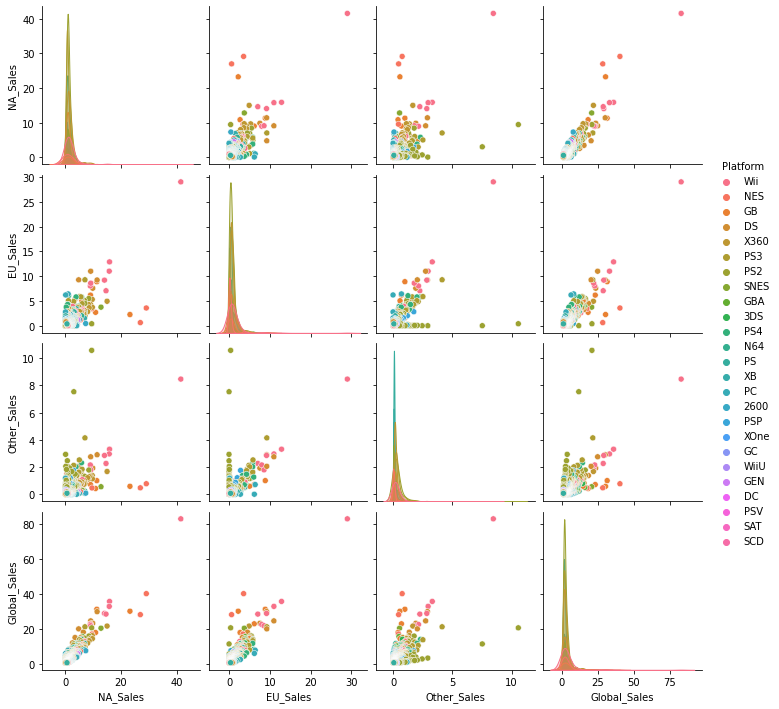

In [20]:
sns.pairplot(vgs_df, hue="Platform")

In [21]:
vgs_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD'], dtype=object)

Text(0.5, 1.0, 'Platform share')

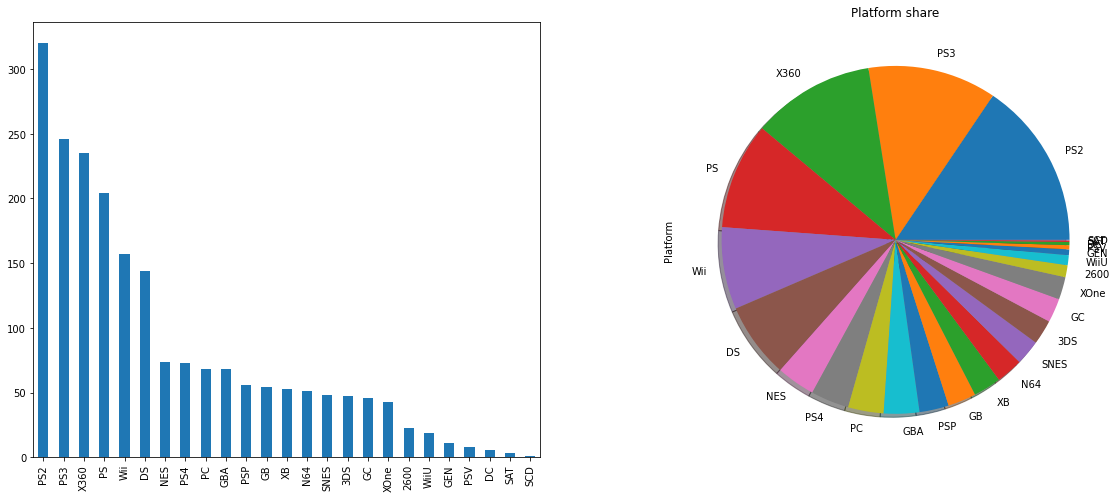

In [22]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

vgs_df.Platform.value_counts().plot.pie(shadow=True, ax=axarr[1])

vgs_df.Platform.value_counts().plot(kind="bar", ax=axarr[0])

plt.title("Platform share")

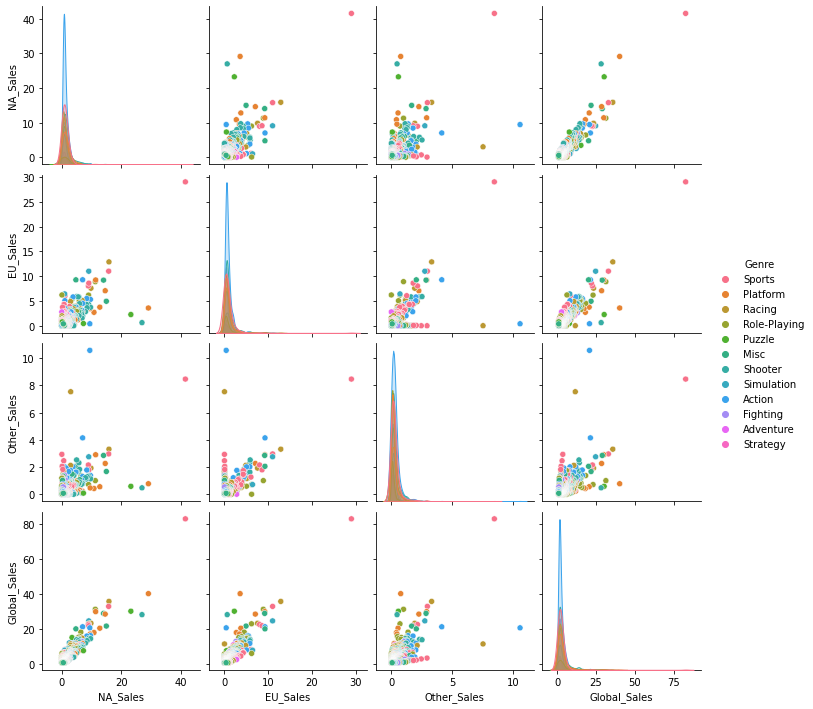

In [23]:
sns.pairplot(vgs_df, hue="Genre")

In [24]:
vgs_df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Text(0.5, 1.0, 'Genre share')

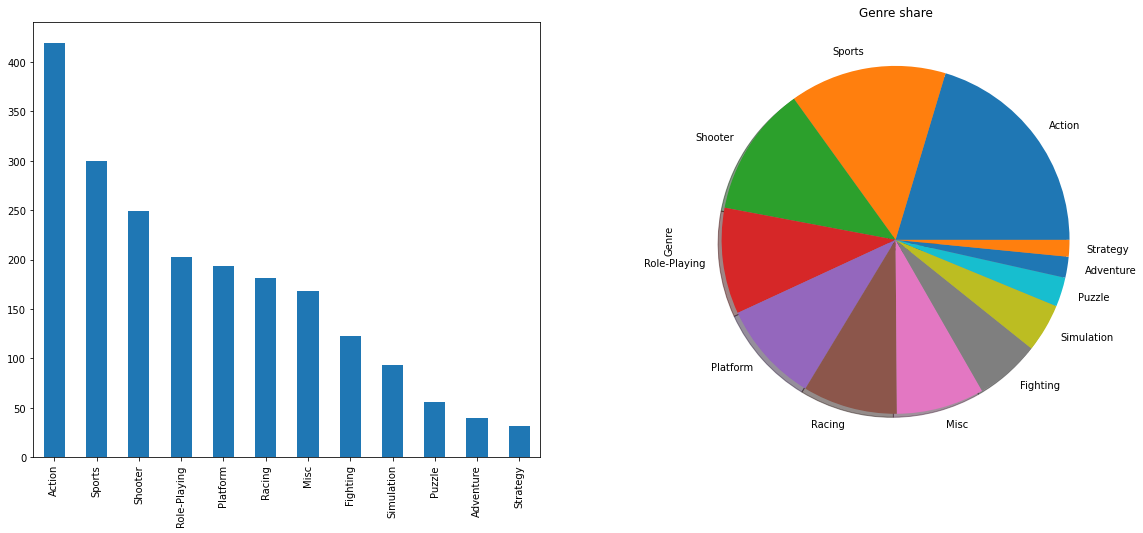

In [25]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

vgs_df.Genre.value_counts().plot.pie(shadow=True, ax=axarr[1])

vgs_df.Genre.value_counts().plot(kind="bar", ax=axarr[0])

plt.title("Genre share")